<a href="https://colab.research.google.com/github/Neighborc/PyProjects/blob/master/UnemploymentProject_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
path = os.getcwd()

In [5]:
df = pd.read_csv(path +'/civilian-unemployment-rate.csv')
df.head()

,realtime_start,realtime_end,value,date,Change
0,2018-11-15,2018-11-15,4.0,1948-01-01,0.0
1,2018-11-15,2018-11-15,4.7,1948-02-01,0.7
2,2018-11-15,2018-11-15,4.5,1948-03-01,-0.2
3,2018-11-15,2018-11-15,4.0,1948-04-01,-0.5
4,2018-11-15,2018-11-15,3.4,1948-05-01,-0.6


In [14]:
value = df['value']
value.head()

0    4.0
1    4.7
2    4.5
3    4.0
4    3.4
Name: value, dtype: float64

In [15]:
df = pd.DataFrame(value)
df.head()

,value
0,4.0
1,4.7
2,4.5
3,4.0
4,3.4


In [16]:
df['t-1'] = df['value'].shift(1)
df['t-2']=df['t-1'].shift(1)


In [17]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



In [18]:
values = list(value)
data = series_to_supervised(values,24)
print(data)

     var1(t-24)  var1(t-23)  var1(t-22)  ...  var1(t-2)  var1(t-1)  var1(t)
24          4.0         4.7         4.5  ...        5.7        6.0      7.6
25          4.7         4.5         4.0  ...        6.0        7.6      7.9
26          4.5         4.0         3.4  ...        7.6        7.9      7.1
27          4.0         3.4         3.9  ...        7.9        7.1      6.0
28          3.4         3.9         3.9  ...        7.1        6.0      5.3
..          ...         ...         ...  ...        ...        ...      ...
845         5.1         5.1         5.0  ...        3.7        3.6      4.2
846         5.1         5.0         4.8  ...        3.6        4.2      4.1
847         5.0         4.8         4.7  ...        4.2        4.1      3.9
848         4.8         4.7         4.4  ...        4.1        3.9      3.6
849         4.7         4.4         4.5  ...        3.9        3.6      3.5

[826 rows x 25 columns]


In [19]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

(600, 1, 24) (600,) (226, 1, 24) (226,)
Epoch 1/50
19/19 - 3s - loss: 24.0342 - val_loss: 12.8223
Epoch 2/50
19/19 - 0s - loss: 6.1373 - val_loss: 4.9089
Epoch 3/50
19/19 - 0s - loss: 2.8182 - val_loss: 3.3110
Epoch 4/50
19/19 - 0s - loss: 2.2714 - val_loss: 2.9559
Epoch 5/50
19/19 - 0s - loss: 2.1963 - val_loss: 2.7965
Epoch 6/50
19/19 - 0s - loss: 2.1151 - val_loss: 2.6333
Epoch 7/50
19/19 - 0s - loss: 2.0134 - val_loss: 2.4816
Epoch 8/50
19/19 - 0s - loss: 1.9052 - val_loss: 2.3637
Epoch 9/50
19/19 - 0s - loss: 1.7607 - val_loss: 2.1992
Epoch 10/50
19/19 - 0s - loss: 1.7299 - val_loss: 2.1168
Epoch 11/50
19/19 - 0s - loss: 1.5902 - val_loss: 1.9333
Epoch 12/50
19/19 - 0s - loss: 1.5010 - val_loss: 1.9010
Epoch 13/50
19/19 - 0s - loss: 1.4297 - val_loss: 1.7570
Epoch 14/50
19/19 - 0s - loss: 1.3232 - val_loss: 1.6826
Epoch 15/50
19/19 - 0s - loss: 1.2356 - val_loss: 1.5506
Epoch 16/50
19/19 - 0s - loss: 1.1489 - val_loss: 1.5381
Epoch 17/50
19/19 - 0s - loss: 1.1338 - val_loss: 1.450

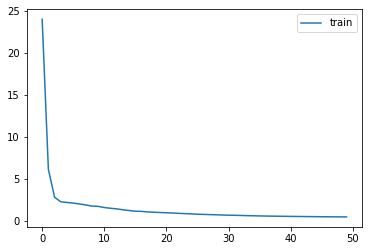

Test RMSE: 0.773


In [20]:
values = data.values
n_train_hours = 600
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)

#inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

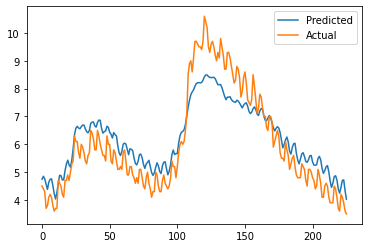

In [26]:
plt.plot(yhat)
plt.plot(test_y)
plt.legend(['Predicted', 'Actual'])